Leitura e análise dos resultados dos experimentos das lacunas seguidas:
-----------
* 1 a 100 (com granularidade 1) 
* 100 a 4200 (com granularidade 100)

In [9]:
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [18]:
#lendo os arquivos dos experimentos dos experimentos de 100 a 4200
mal1_4200=as.data.frame(read.table("ESC/100-4200/grouped_mal.txt"))
kal1_4200=as.data.frame(read.table("ESC/100-4200/grouped_kal.txt"))
ssa1_4200=as.data.frame(read.table("ESC/100-4200/grouped_ssa.txt"))
sti1_4200=as.data.frame(read.table("ESC/100-4200/grouped_sti.txt"))
spl1_4200=as.data.frame(read.table("ESC/100-4200/grouped_spl.txt"))

names(mal1_4200)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal1_4200)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(ssa1_4200)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti1_4200)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl1_4200)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

#Tirando a média do experimentos de 1_4200
tamanhoGap1_4200= seq(1,4200,100) 
mediaSsa1_4200=c()
mediaSpl1_4200=c()
mediaKal1_4200=c()
mediaMal1_4200=c()
mediaSti1_4200=c()
sdSsa1_4200=c()
sdSpl1_4200=c()
sdKal1_4200=c()
sdMal1_4200=c()
sdSti1_4200=c()

for (i in seq(1,42,1)) {
    #calculando a média
	mediaSsa1_4200=append(mediaSsa1_4200,(mean(ssa1_4200$RMSE[seq(i,1260, 42)])))
	mediaSpl1_4200=append(mediaSpl1_4200,(mean(spl1_4200$RMSE[seq(i,1260, 42)])))
	mediaKal1_4200=append(mediaKal1_4200,(mean(kal1_4200$RMSE[seq(i,1260, 42)])))
	mediaMal1_4200=append(mediaMal1_4200,(mean(mal1_4200$RMSE[seq(i,1260, 42)])))
	mediaSti1_4200=append(mediaSti1_4200,(mean(sti1_4200$RMSE[seq(i,1260, 42)])))

    #Calculando o desvio padrão
    sdSsa1_4200=append(sdSsa1_4200,(sd(ssa1_4200$RMSE[seq(i,1260, 42)])))
	sdSpl1_4200=append(sdSpl1_4200,(sd(spl1_4200$RMSE[seq(i,1260, 42)])))
	sdKal1_4200=append(sdKal1_4200,(sd(kal1_4200$RMSE[seq(i,1260, 42)])))
	sdMal1_4200=append(sdMal1_4200,(sd(mal1_4200$RMSE[seq(i,1260, 42)])))
	sdSti1_4200=append(sdSti1_4200,(sd(sti1_4200$RMSE[seq(i,1260, 42)])))
}

mediaKal1_4200=as.data.frame(mediaKal1_4200)
names(mediaKal1_4200)=c("media")
mediaKal1_4200$sd=sdKal1_4200
mediaKal1_4200$tamanho=tamanhoGap1_4200
mediaKal1_4200$algoritmo="Kalman"

mediaMal1_4200=as.data.frame(mediaMal1_4200)
names(mediaMal1_4200)=c("media")
mediaMal1_4200$sd=sdMal1_4200
mediaMal1_4200$tamanho=tamanhoGap1_4200
mediaMal1_4200$algoritmo="Moving Average"


mediaSti1_4200=as.data.frame(mediaSti1_4200)
names(mediaSti1_4200)=c("media")
mediaSti1_4200$sd=sdSti1_4200
mediaSti1_4200$tamanho=tamanhoGap1_4200
mediaSti1_4200$algoritmo="Stine"

mediaSpl1_4200=as.data.frame(mediaSpl1_4200)
names(mediaSpl1_4200)=c("media")
mediaSpl1_4200$sd=sdSpl1_4200
mediaSpl1_4200$tamanho=tamanhoGap1_4200
mediaSpl1_4200$algoritmo="Spline"

mediaSsa1_4200=as.data.frame(mediaSsa1_4200)
names(mediaSsa1_4200)=c("media")
mediaSsa1_4200$sd=sdSsa1_4200
mediaSsa1_4200$tamanho=tamanhoGap1_4200
mediaSsa1_4200$algoritmo="SSA"


In [11]:
#lendo os arquivos dos experimentos dos experimentos de 1 a 100 de lacunas seguidas 

mal1_100=as.data.frame(read.table("ESC/0-100/grouped_mal.txt"))
kal1_100=as.data.frame(read.table("ESC/0-100/grouped_kal.txt"))
sti1_100=as.data.frame(read.table("ESC/0-100/grouped_sti.txt"))
spl1_100=as.data.frame(read.table("ESC/0-100/grouped_spl.txt"))
ssa1_100=as.data.frame(read.table("ESC/0-100/grouped_ssa.txt"))

names(mal1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(ssa1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

#função de auxilio para a extração dos resultados 
func <- function(i){
    ob=c(i,i+100,i+200)
    
    return(ob)
}

#variáveis de auxilio
tamanhoGap1_100= seq(1,100,1) 
mediaSpl1_100=c()
mediaKal1_100=c()
mediaMal1_100=c()
mediaSti1_100=c()
mediaSsa1_100=c()

sdSpl1_100=c()
sdKal1_100=c()
sdMal1_100=c()
sdSti1_100=c()
sdSsa1_100=c()

varSpl1_100=c()
varKal1_100=c()
varMal1_100=c()
varSti1_100=c()
varSsa1_100=c()

sdLacSpl1_100=c()
sdLacKal1_100=c()
sdLacMal1_100=c()
sdLacSti1_100=c()
sdLacSsa1_100=c()

varLacSpl1_100=c()
varLacKal1_100=c()
varLacMal1_100=c()
varLacSti1_100=c()
varLacSsa1_100=c()

mediaLacSpl1_100=c()
mediaLacKal1_100=c()
mediaLacMal1_100=c()
mediaLacSti1_100=c()
mediaLacSsa1_100=c()

a=c()

for(z in seq(1,100,1)){
    for (i in seq(z,9000,300)){
        a=(func(i))
#        print(a)        
       # Calculando a média dos treŝ experimentos por dia, distribuidos na amostra
        mediaLacSpl1_100=append(mediaLacSpl1_100, mean(spl1_100$RMSE[a])) 
        mediaLacKal1_100=append(mediaLacKal1_100, mean(kal1_100$RMSE[a])) 
        mediaLacMal1_100=append(mediaLacMal1_100, mean(mal1_100$RMSE[a])) 
        mediaLacSti1_100=append(mediaLacSti1_100, mean(sti1_100$RMSE[a]))
        mediaLacSsa1_100=append(mediaLacSsa1_100, mean(ssa1_100$RMSE[a]))
        
        #calculando o desvio padrão  dos treŝ experimentos por dia, distribuidos na amostra
        sdLacSpl1_100=append(sdLacSpl1_100, sd(spl1_100$RMSE[a])) 
        sdLacKal1_100=append(sdLacKal1_100, sd(kal1_100$RMSE[a])) 
        sdLacMal1_100=append(sdLacMal1_100, sd(mal1_100$RMSE[a])) 
        sdLacSti1_100=append(sdLacSti1_100, sd(sti1_100$RMSE[a])) 
        sdLacSsa1_100=append(sdLacSsa1_100, sd(ssa1_100$RMSE[a])) 
        
        
        #calculando a variancia  dos treŝ experimentos por dia, distribuidos na amostra
        varLacSpl1_100=append(varLacSpl1_100, var(spl1_100$RMSE[a])) 
        varLacKal1_100=append(varLacKal1_100, var(kal1_100$RMSE[a])) 
        varLacMal1_100=append(varLacMal1_100, var(mal1_100$RMSE[a])) 
        varLacSti1_100=append(varLacSti1_100, var(sti1_100$RMSE[a])) 
        varLacSsa1_100=append(varLacSsa1_100, var(ssa1_100$RMSE[a])) 
    }
}


for (i in seq(1,3000,30)) {
    #calculando a média dos experimentos de tamanho i pelas 30 amostras (30 dias, 30 amostras, 3 por dia) ou seja,  
    #primeiro tirei a média das três observações do dia, depois tirei a média das 30 observações (do mês) 
	mediaSpl1_100=append(mediaSpl1_100,(mean(mediaLacSpl1_100[i:(i+29)])))
	mediaKal1_100=append(mediaKal1_100,(mean(mediaLacKal1_100[i:(i+29)])))
	mediaMal1_100=append(mediaMal1_100,(mean(mediaLacMal1_100[i:(i+29)])))
	mediaSti1_100=append(mediaSti1_100,(mean(mediaLacSti1_100[i:(i+29)])))
	mediaSsa1_100=append(mediaSsa1_100,(mean(mediaLacSsa1_100[i:(i+29)])))

    #calculando o devio padrão
	sdSpl1_100=append(sdSpl1_100,(mean(sdLacSpl1_100[i:(i+29)])))
	sdKal1_100=append(sdKal1_100,(mean(sdLacKal1_100[i:(i+29)])))
	sdMal1_100=append(sdMal1_100,(mean(sdLacMal1_100[i:(i+29)])))
	sdSti1_100=append(sdSti1_100,(mean(sdLacSti1_100[i:(i+29)])))
	sdSsa1_100=append(sdSsa1_100,(mean(sdLacSsa1_100[i:(i+29)])))
    
        #calculando a variancia
	varSpl1_100=append(varSpl1_100,(mean(varLacSpl1_100[i:(i+29)])))
	varKal1_100=append(varKal1_100,(mean(varLacKal1_100[i:(i+29)])))
	varMal1_100=append(varMal1_100,(mean(varLacMal1_100[i:(i+29)])))
	varSti1_100=append(varSti1_100,(mean(varLacSti1_100[i:(i+29)])))
	varSsa1_100=append(varSsa1_100,(mean(varLacSsa1_100[i:(i+29)])))
}


mediaKal1_100=as.data.frame(mediaKal1_100)
names(mediaKal1_100)=c("media")
mediaKal1_100$sd=sdKal1_100
#mediaKal1_100$var=varKal1_100
mediaKal1_100$tamanho=tamanhoGap1_100
mediaKal1_100$algoritmo="Kalman"

mediaMal1_100=as.data.frame(mediaMal1_100)
names(mediaMal1_100)=c("media")
mediaMal1_100$sd=sdMal1_100
#mediaMal1_100$var=varMal1_100
mediaMal1_100$tamanho=tamanhoGap1_100
mediaMal1_100$algoritmo="Moving Average"


mediaSti1_100=as.data.frame(mediaSti1_100)
names(mediaSti1_100)=c("media")
mediaSti1_100$sd=sdSti1_100
#mediaSti1_100$var=varSti1_100
mediaSti1_100$tamanho=tamanhoGap1_100
mediaSti1_100$algoritmo="Stine"

mediaSpl1_100=as.data.frame(mediaSpl1_100)
names(mediaSpl1_100)=c("media")
mediaSpl1_100$sd=sdSpl1_100
#mediaSpl1_100$var=varSpl1_100
mediaSpl1_100$tamanho=tamanhoGap1_100
mediaSpl1_100$algoritmo="Spline"

mediaSsa1_100=as.data.frame(mediaSsa1_100)
names(mediaSsa1_100)=c("media")
mediaSsa1_100$sd=sdSsa1_100
#mediaSsa1_100$var=varSsa1_100
mediaSsa1_100$tamanho=tamanhoGap1_100
mediaSsa1_100$algoritmo="SSA"

In [12]:
todos=rbind(mediaKal1_100,
            mediaMal1_100,
            mediaSti1_100,
            mediaSpl1_100,
            mediaSsa1_100,
            mediaKal1_4200,
            mediaMal1_4200,
            mediaSti1_4200,
            mediaSpl1_4200,
            mediaSsa1_4200)
            
summary(todos)

     media                sd             tamanho        algoritmo        
 Min.   :0.009251   Min.   :0.01346   Min.   :   1.0   Length:710        
 1st Qu.:0.046808   1st Qu.:0.03853   1st Qu.:  36.0   Class :character  
 Median :0.072547   Median :0.07007   Median :  71.5   Mode  :character  
 Mean   :0.080539   Mean   :0.07730   Mean   : 671.5                     
 3rd Qu.:0.095885   3rd Qu.:0.09775   3rd Qu.: 700.0                     
 Max.   :0.342701   Max.   :0.41747   Max.   :4200.0                     

In [13]:
(filter(todos, tamanho==100))

media,sd,tamanho,algoritmo
0.08991726,0.11568136,100,Kalman
0.08112355,0.09032845,100,Moving Average
0.09311604,0.11897636,100,Stine
0.13781484,0.15523791,100,Spline
0.10865224,0.08656537,100,SSA
0.01125227,0.01777725,100,Kalman
0.01425381,0.02112611,100,Moving Average
0.01235249,0.01824275,100,Stine
0.03833583,0.04944831,100,Spline
0.05511123,0.03463060,100,SSA


[1] 710

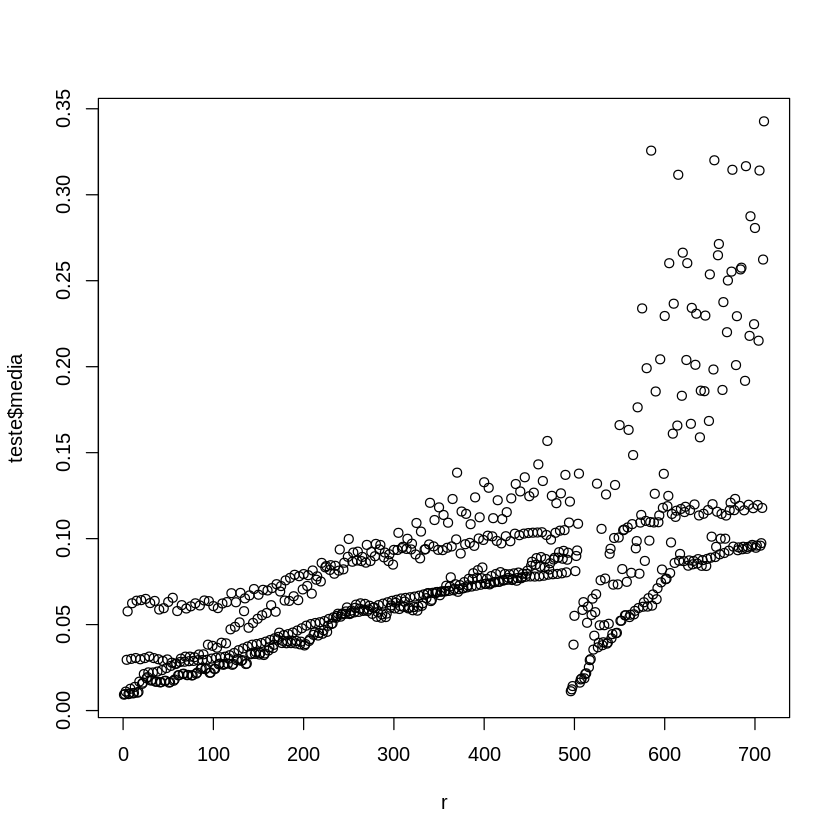

In [14]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
length(teste$tamanho)
r=seq(1,710,1)
plot(teste$media~r)


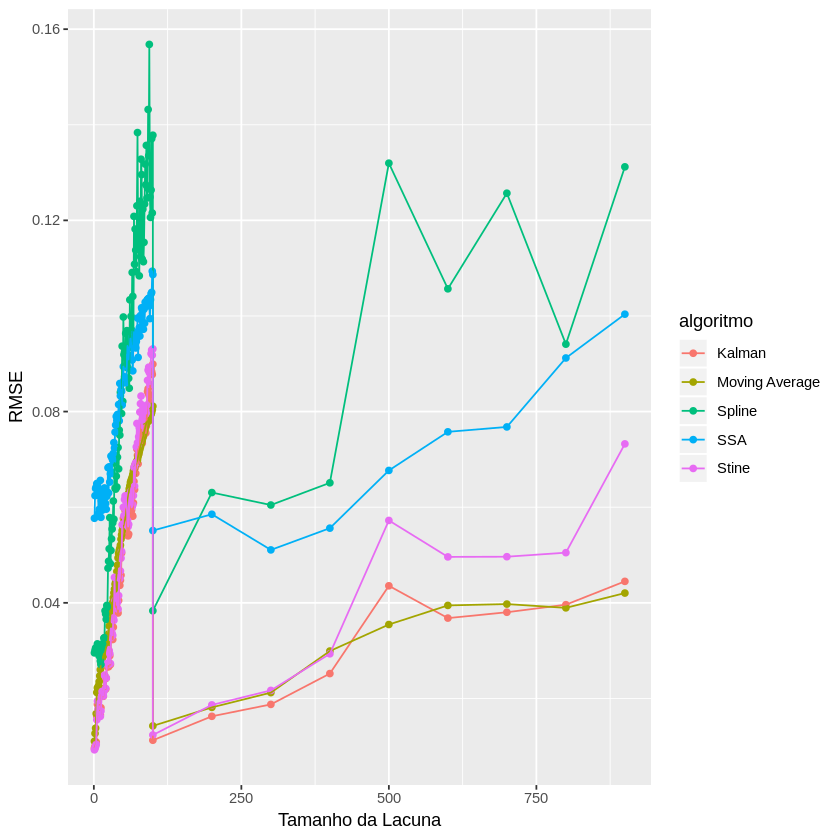

In [20]:
ggplot(todos[which(todos$tamanho<1000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=1)+
    labs(y="RMSE", x="Tamanho da Lacuna")
